In [1]:
import numpy as np
import matplotlib.pyplot as plt
#define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [2]:
#loss function:log likelihoood
def compute_loss(y,hx):
   return -np.mean(y*np.log(hx)+(1-y)*np.log(1-hx))


In [3]:
#gradient of the loss 
def compute_gradient(X,y,hx):
    return np.dot(X.T,(hx-y)/y.shape[0])#y.shape  calculates no of data points we have 


Text(0.5, 1.0, 'Initial data distribution')

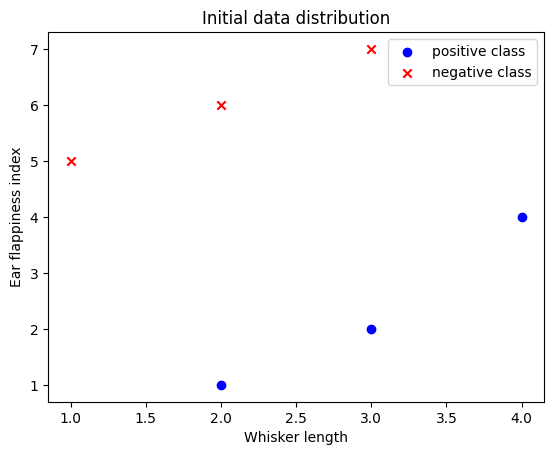

In [19]:
#dataset
x=np.array([[2,1],[3,2],[4,4],[1,5],[2,6],[3,7]])#labels
y=np.array([1,1,1,0,0,0])#labels
#plot initial data
plt.scatter(x[:3,0],x[:3,1],color='blue',marker='o',label='positive class')
plt.scatter(x[3:,0],x[3:,1],color='red',marker='x',label='negative class')
plt.xlabel('Whisker length')
plt.ylabel('Ear flappiness index')
plt.legend()
plt.title('Initial data distribution')  


In [28]:
#logistic regression algorithm 
def logistic_regression(X,y,learning_rate=0.01,num_iterations=100):
    #add intercept term to X
    X=np.hstack((np.ones((X.shape[0],1)),X))#horizontally stacking
    #initialize weights
    w=np.zeros(X.shape[1])
    #gradient descent 
    for i in range(num_iterations):
        #linear model
        z=np.dot(X,w)
        #sigmoid function to get predicted probabilities
        hx=sigmoid(z)
        #compute loss for monitoring
        loss=compute_loss(y,hx)
        gradient=compute_gradient(X,y,hx)
        #update weights and bias
        w-=learning_rate*gradient


        if i%10==0:
            plot_decision_boundary(X,y,w,loss,i)
            print(f'Iteration {i}:Theta={w}, Loss: {loss:.4f}')
    return w

    

In [29]:
#plotting function for decision boundary 
def plot_decision_boundary(X,y,w,loss,iteration):
    plt.scatter(X[:3,1],X[:3,2],color='blue',marker='o',label='positive class' if iteration == 0 else "")
    plt.scatter(X[3:,1],X[3:,2],color='red',marker='x',label='negative class' if iteration == 0 else "")
    x_values=np.array([np.min(X[:,1])-1,np.max(X[:,1])+1])
    y_values=-(w[0]+w[1]*x_values)/w[2]
    plt.plot(x_values,y_values,"k")
    plt.xlim(x_values[0],x_values[1])
    plt.ylim(np.min(X[:,2])-1,np.max(X[:,2])+1)
    plt.xlabel('Whisker length')
    plt.ylabel('Ear flappiness index')
    plt.title(f'Iteration {iteration}, Loss: {loss:.4f}')
    if iteration==0:
       plt.legend()
    plt.show()


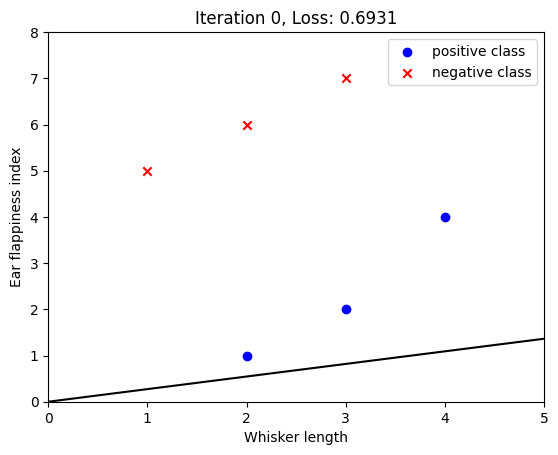

Iteration 0:Theta=[ 0.          0.0025     -0.00916667], Loss: 0.6931


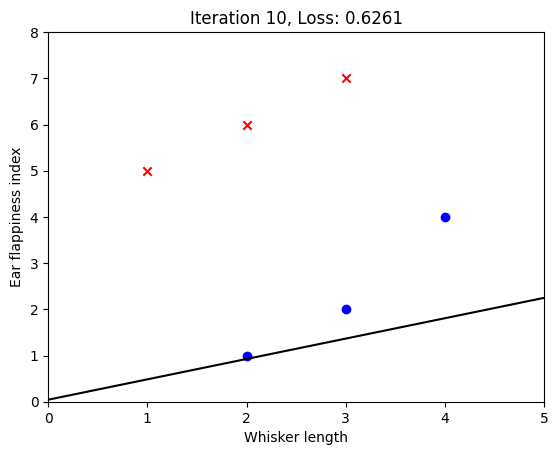

Iteration 10:Theta=[ 0.00351898  0.03583314 -0.08124515], Loss: 0.6261


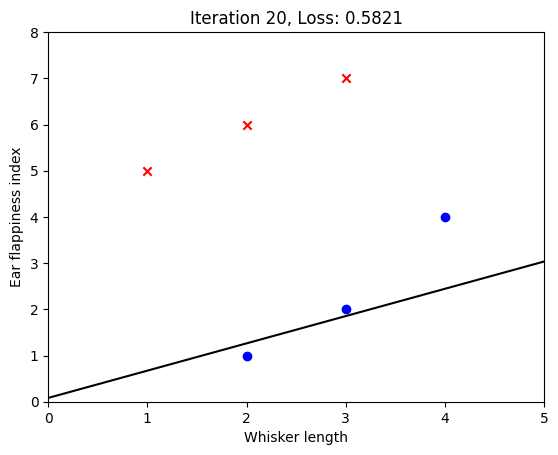

Iteration 20:Theta=[ 0.0107534   0.07750049 -0.13121449], Loss: 0.5821


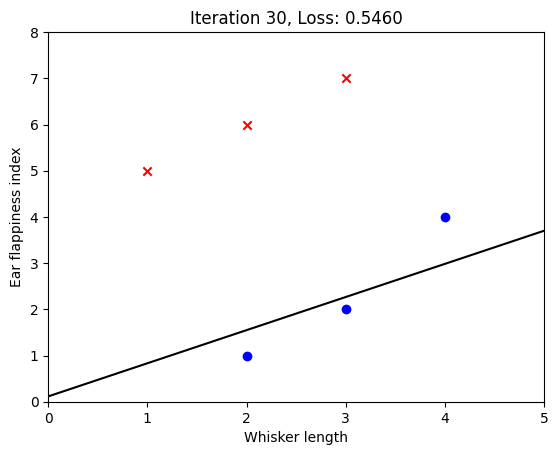

Iteration 30:Theta=[ 0.01952555  0.12200009 -0.17007813], Loss: 0.5460


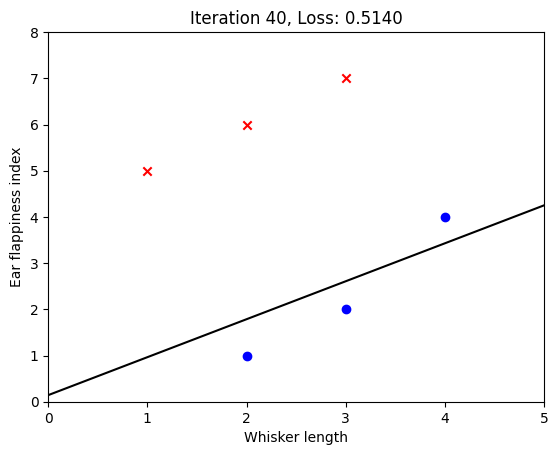

Iteration 40:Theta=[ 0.02882972  0.16681759 -0.20296236], Loss: 0.5140


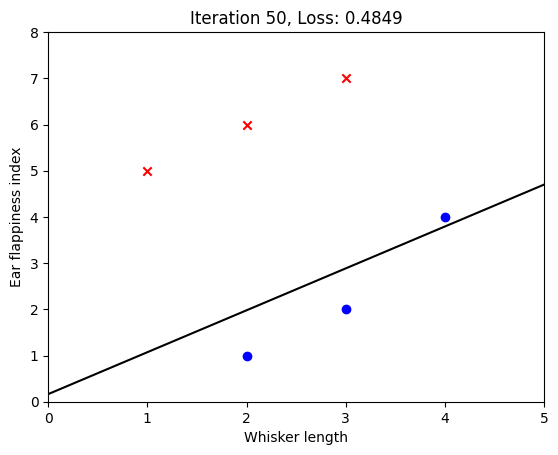

Iteration 50:Theta=[ 0.03819345  0.21079708 -0.23234289], Loss: 0.4849


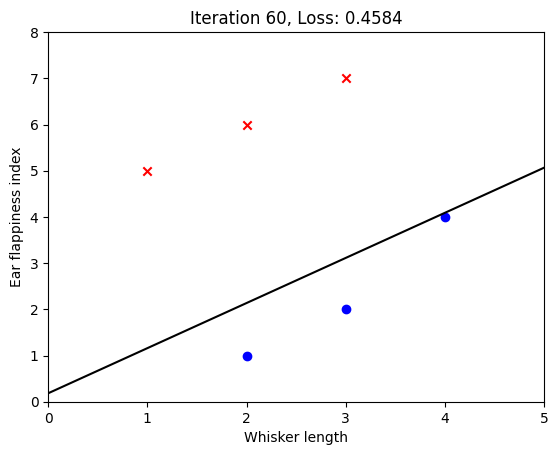

Iteration 60:Theta=[ 0.04739475  0.25342232 -0.25946218], Loss: 0.4584


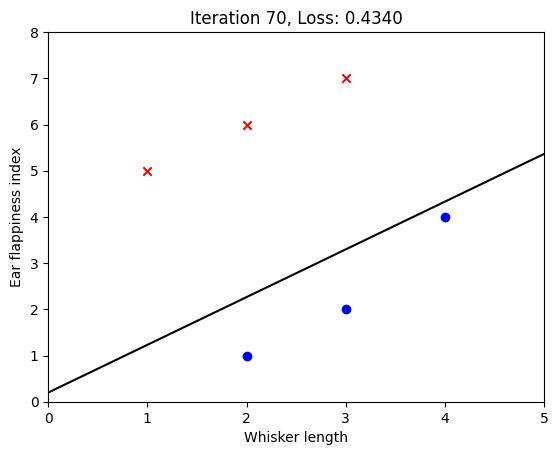

Iteration 70:Theta=[ 0.05633317  0.29448797 -0.28496725], Loss: 0.4340


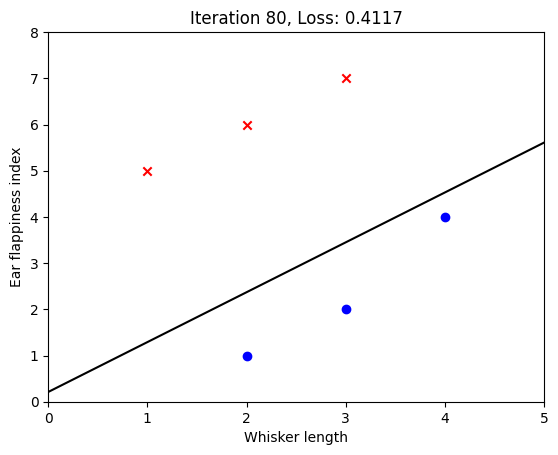

Iteration 80:Theta=[ 0.0649683   0.33394185 -0.30920989], Loss: 0.4117


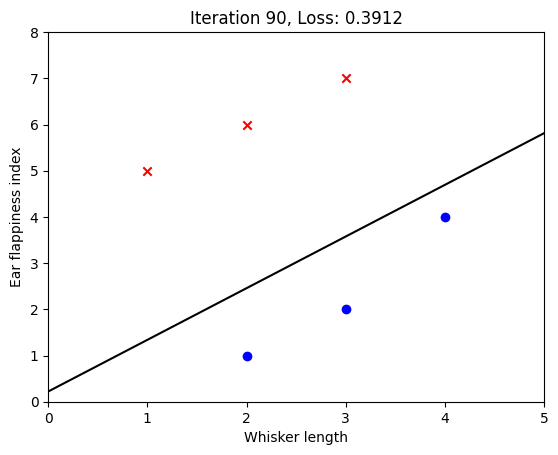

Iteration 90:Theta=[ 0.07328952  0.37180678 -0.33239254], Loss: 0.3912


In [31]:
#training the model
final_weights=logistic_regression(x,y,learning_rate=0.01,num_iterations=100)
